In [1]:
import elf 
import siesta_utils.grid as siesta 
from siesta_utils.conversions import AtoBohr
from ase.io import read, write
import numpy as np 
# import xcml
import pickle
import re
from ase import Atoms
from elf import ElF
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os

In [3]:
basis = {'r_o_o': 1.0,'r_i_o': 0.05, 'r_i_h': 0.0, 'r_o_h' : 1.5,
                      'n_rad_o' : 2,'n_rad_h' : 2, 'n_l_o' : 3,
                      'n_l_h' : 2, 'gamma_o': 0, 'gamma_h': 0}

In [4]:
elf.utils.preprocess_all('outputs', basis, method='elf', view = elf.utils.get_view('default'))

/home/sebastian/miniconda3/lib/python3.6/site-packages/ipyparallel/client/client.py:459: RuntimeWarning: 
            Controller appears to be listening on localhost, but not on this machine.
            If this is true, you should specify Client(...,sshserver='you@sebastian-XPS-13-9360')
            or instruct your controller to listen on an external IP.
  RuntimeWarning)


Clients operating : 4


[[<elf.elf.ElF at 0x7f8cb6097588>,

In [5]:
elfs = elf.utils.hdf5_to_elfs('outputs_processed.hdf5','OH')

In [6]:
elfs[0][0].basis

{}

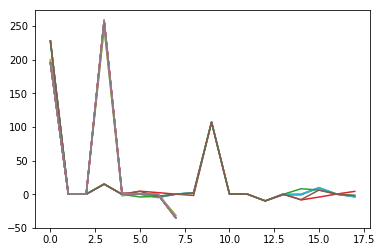

In [7]:
for sys in elfs:
    for e in sys:
        plot(e.value)